In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, \
    mean_squared_error, r2_score, f1_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from torch.nn.functional import grid_sample
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor, CatBoostClassifier

/Users/davidhristov/miniconda3/envs/myenvconda2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('datasets/blood_pressure_data.csv')

In [3]:
df

,id,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
0,NaN,NaN,180.0,65.0,70.0,NaN,149.0,NaN,NaN,87.0,13.9,1.0,NaN,19.0,NaN,NaN,No,112.0
1,57468.0,7/5/1979,150.0,50.0,88.0,92.0,219.0,LOW,NaN,137.0,13.2,NaN,0.6,26.0,17.0,NaN,No,138.0
2,55209.0,11/27/1954,175.0,75.0,NaN,NaN,217.0,NORMAL,50.0,142.0,NaN,1.0,0.8,22.0,22.0,NaN,No,137.0
3,3335.0,9/13/1984,160.0,NaN,NaN,100.0,160.0,HiGH,48.0,84.0,12.1,1.0,0.6,15.0,19.0,14.0,No,133.0
4,70782.0,8/15/1984,170.0,NaN,68.0,99.0,176.0,LOW,NaN,96.0,13.8,1.0,0.9,33.0,NaN,11.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,43983.0,NaN,180.0,75.0,69.0,100.0,180.0,ABNORMAL,76.0,98.0,14.7,NaN,0.8,29.0,39.0,73.0,No,120.0
9996,65781.0,NaN,160.0,NaN,72.0,100.0,NaN,NORMAL,NaN,99.0,15.3,1.0,0.7,22.0,49.0,91.0,No,110.0
9997,125800.0,8/3/1989,165.0,65.0,72.0,83.0,207.0,NaN,65.0,134.0,NaN,1.0,0.9,20.0,21.0,23.0,No,128.0
9998,6795.0,NaN,160.0,75.0,82.0,88.0,NaN,HiGH,63.0,112.0,14.4,1.0,0.9,18.0,15.0,64.0,No,121.0


In [3]:
df.drop(columns='id', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               7312 non-null   object 
 1   height(cm)        7373 non-null   float64
 2   weight(kg)        7444 non-null   float64
 3   relaxation        7425 non-null   float64
 4   blood sugar       7438 non-null   float64
 5   Cholesterol       7386 non-null   float64
 6   triglyceride      8644 non-null   object 
 7   HDL               7391 non-null   float64
 8   LDL               7358 non-null   float64
 9   hemoglobin        7417 non-null   float64
 10  Urine protein     7475 non-null   float64
 11  serum creatinine  7433 non-null   float64
 12  AST               7427 non-null   float64
 13  ALT               7416 non-null   float64
 14  Gtp               7411 non-null   float64
 15  dental caries     10000 non-null  object 
 16  blood pressure    7477 non-null   float64

<Axes: >

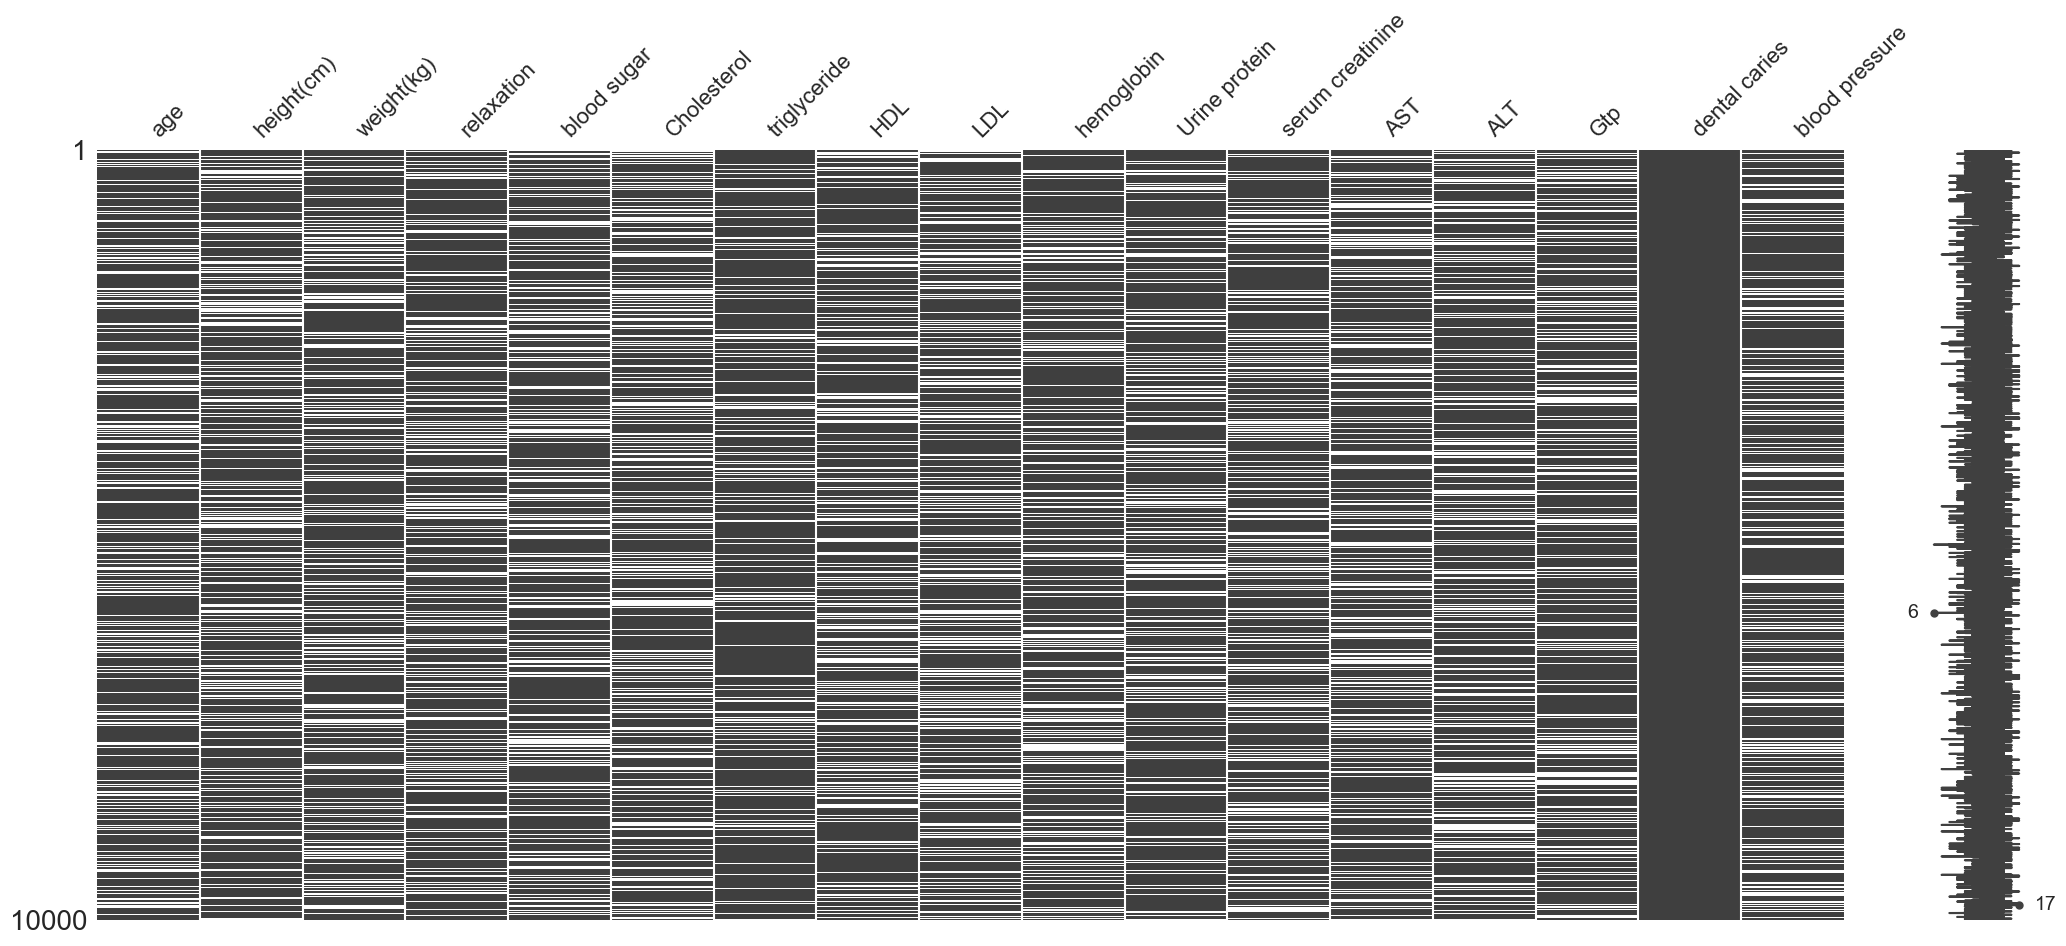

In [7]:
msno.matrix(df)

<Axes: >

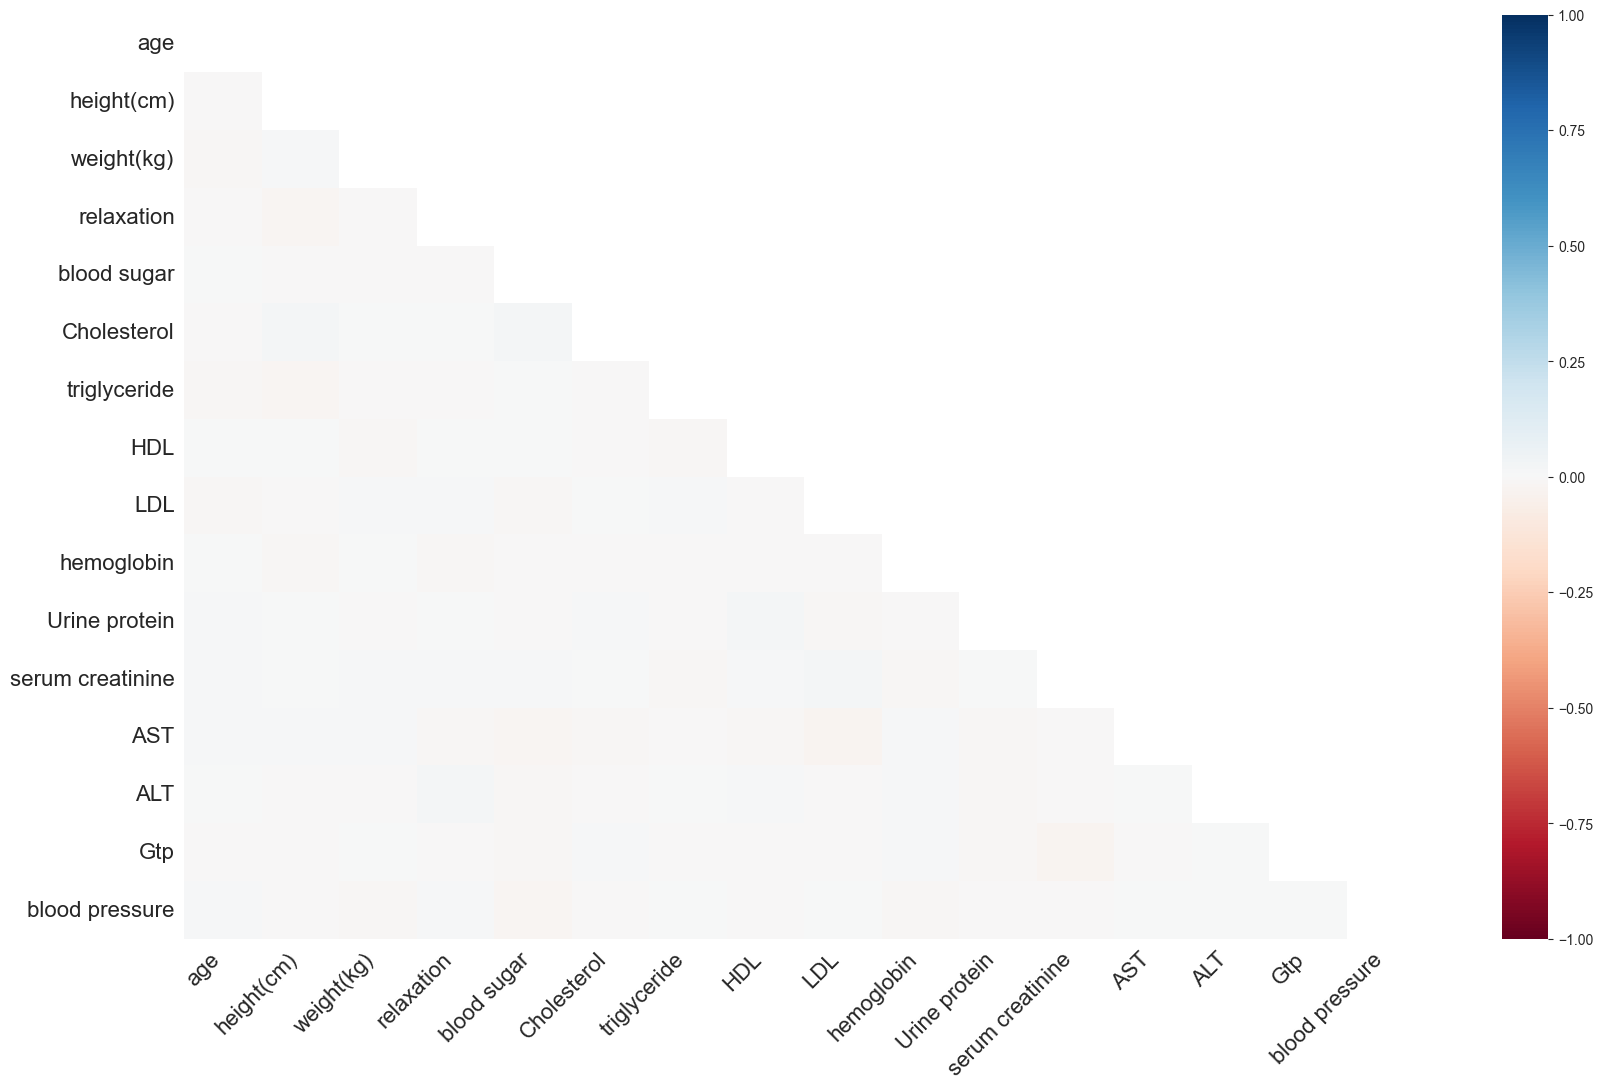

In [8]:
msno.heatmap(df)

<Axes: >

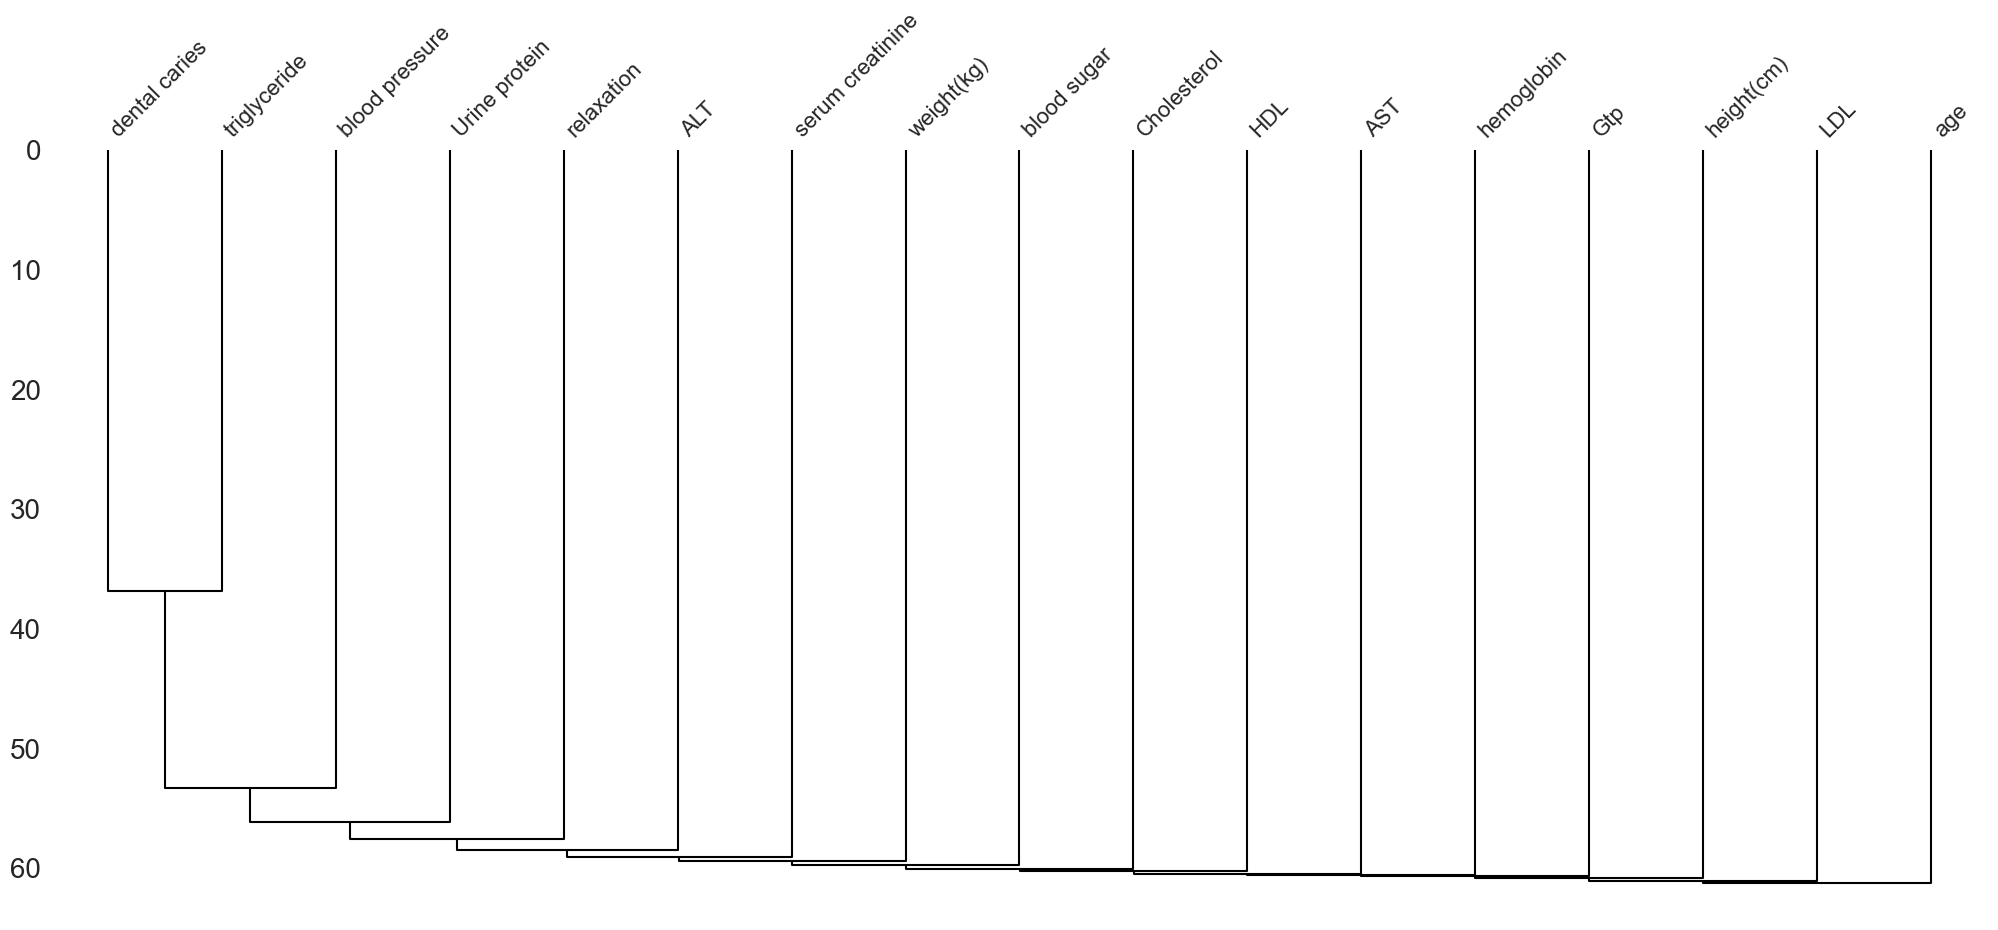

In [15]:
msno.dendrogram(df)

In [9]:
df.isnull().sum()

age                 2688
height(cm)          2627
weight(kg)          2556
relaxation          2575
blood sugar         2562
Cholesterol         2614
triglyceride        1356
HDL                 2609
LDL                 2642
hemoglobin          2583
Urine protein       2525
serum creatinine    2567
AST                 2573
ALT                 2584
Gtp                 2589
dental caries          0
blood pressure      2523
dtype: int64

In [58]:
df['blood pressure'].value_counts()

blood pressure
130.0    535
120.0    534
110.0    504
118.0    433
138.0    219
        ... 
168.0      1
87.0       1
181.0      1
190.0      1
164.0      1
Name: count, Length: 84, dtype: int64

In [4]:
df['age'] = pd.to_datetime(df['age'], errors="coerce").dt.year
current_year = pd.to_datetime('today').year
df['age'] = current_year - df['age']

In [89]:
df['age']

0        NaN
1       46.0
2       71.0
3       41.0
4       41.0
        ... 
9995     NaN
9996     NaN
9997    36.0
9998     NaN
9999    36.0
Name: age, Length: 10000, dtype: float64

In [20]:
df

,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
0,NaN,180.0,65.0,70.0,NaN,149.0,NaN,NaN,87.0,13.9,1.0,NaN,19.0,NaN,NaN,No,112.0
1,55.0,150.0,50.0,88.0,92.0,219.0,LOW,NaN,137.0,13.2,NaN,0.6,26.0,17.0,NaN,No,138.0
2,55.0,175.0,75.0,NaN,NaN,217.0,NORMAL,50.0,142.0,NaN,1.0,0.8,22.0,22.0,NaN,No,137.0
3,55.0,160.0,NaN,NaN,100.0,160.0,HiGH,48.0,84.0,12.1,1.0,0.6,15.0,19.0,14.0,No,133.0
4,55.0,170.0,NaN,68.0,99.0,176.0,LOW,NaN,96.0,13.8,1.0,0.9,33.0,NaN,11.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,180.0,75.0,69.0,100.0,180.0,ABNORMAL,76.0,98.0,14.7,NaN,0.8,29.0,39.0,73.0,No,120.0
9996,NaN,160.0,NaN,72.0,100.0,NaN,NORMAL,NaN,99.0,15.3,1.0,0.7,22.0,49.0,91.0,No,110.0
9997,55.0,165.0,65.0,72.0,83.0,207.0,NaN,65.0,134.0,NaN,1.0,0.9,20.0,21.0,23.0,No,128.0
9998,NaN,160.0,75.0,82.0,88.0,NaN,HiGH,63.0,112.0,14.4,1.0,0.9,18.0,15.0,64.0,No,121.0


In [5]:
encoder = LabelEncoder()

df['dental caries'] = encoder.fit_transform(df['dental caries'])

In [6]:
df['triglyceride'].unique()

array([nan, 'LOW', 'NORMAL', 'HiGH', 'UNK', 'ABNORMAL'], dtype=object)

In [7]:
df['triglyceride'] = df['triglyceride'].fillna(df['triglyceride'].mode()[0])

In [95]:
df['triglyceride']

0            LOW
1            LOW
2         NORMAL
3           HiGH
4            LOW
          ...   
9995    ABNORMAL
9996      NORMAL
9997         LOW
9998        HiGH
9999         UNK
Name: triglyceride, Length: 10000, dtype: object

In [97]:
# df_encoded = pd.get_dummies(data = df, columns=['triglyceride'])

In [8]:
categories = [["UNK", "LOW", "NORMAL", "HiGH", "ABNORMAL"]]

ordinal_encoder = OrdinalEncoder(categories=categories)

df['triglyceride'] = ordinal_encoder.fit_transform(df[['triglyceride']])

In [9]:
imputer = SimpleImputer(strategy='median')

df['age'] = imputer.fit_transform(df[['age']])

In [99]:
df.isnull().sum()

age                    0
height(cm)          2627
weight(kg)          2556
relaxation          2575
blood sugar         2562
Cholesterol         2614
triglyceride           0
HDL                 2609
LDL                 2642
hemoglobin          2583
Urine protein       2525
serum creatinine    2567
AST                 2573
ALT                 2584
Gtp                 2589
dental caries          0
blood pressure      2523
dtype: int64

In [10]:
numerical_columns = [
    'age','height(cm)', 'weight(kg)', 'relaxation', 'blood sugar', 'Cholesterol', 
     'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 
    'AST', 'ALT', 'Gtp', 'blood pressure'
]

In [11]:
knn_imputer = KNNImputer(n_neighbors=5)

df[numerical_columns] = knn_imputer.fit_transform(df[numerical_columns])

In [130]:
df.isnull().sum()

age                 0
height(cm)          0
weight(kg)          0
relaxation          0
blood sugar         0
Cholesterol         0
triglyceride        0
HDL                 0
LDL                 0
hemoglobin          0
Urine protein       0
serum creatinine    0
AST                 0
ALT                 0
Gtp                 0
dental caries       0
blood pressure      0
dtype: int64

<Axes: >

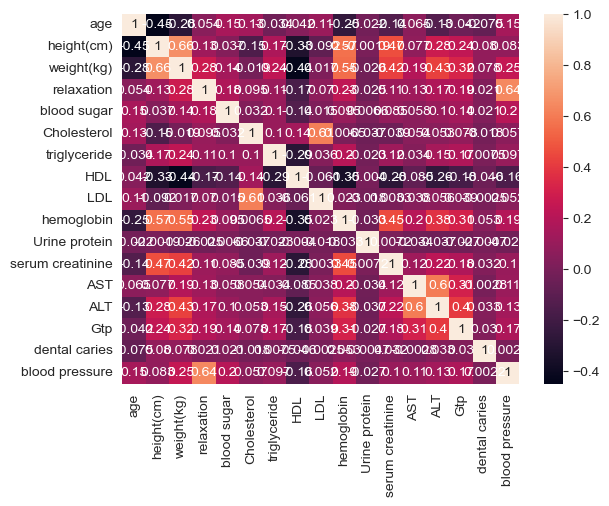

In [23]:
sns.heatmap(df.corr(), annot=True)

In [44]:
df

,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
0,55.0,180.0,65.0,70.0,90.2,149.0,1.0,64.4,87.0,13.90,1.0,0.8,19.0,24.8,30.6,0,112.0
1,55.0,150.0,50.0,88.0,92.0,219.0,1.0,62.2,137.0,13.20,1.0,0.6,26.0,17.0,19.6,0,138.0
2,55.0,175.0,75.0,73.4,91.6,217.0,2.0,50.0,142.0,14.92,1.0,0.8,22.0,22.0,28.2,0,137.0
3,55.0,160.0,64.0,79.2,100.0,160.0,3.0,48.0,84.0,12.10,1.0,0.6,15.0,19.0,14.0,0,133.0
4,55.0,170.0,58.0,68.0,99.0,176.0,1.0,65.0,96.0,13.80,1.0,0.9,33.0,36.4,11.0,0,120.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,55.0,180.0,75.0,69.0,100.0,180.0,4.0,76.0,98.0,14.70,1.0,0.8,29.0,39.0,73.0,0,120.0
9996,55.0,160.0,55.0,72.0,100.0,170.4,2.0,65.0,99.0,15.30,1.0,0.7,22.0,49.0,91.0,0,110.0
9997,55.0,165.0,65.0,72.0,83.0,207.0,1.0,65.0,134.0,14.44,1.0,0.9,20.0,21.0,23.0,0,128.0
9998,55.0,160.0,75.0,82.0,88.0,197.8,3.0,63.0,112.0,14.40,1.0,0.9,18.0,15.0,64.0,0,121.0


In [12]:
x = df.drop(columns='blood pressure')
y = df['blood pressure']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
le = LabelEncoder()
y = le.fit_transform(y)

In [134]:
df['blood pressure'].unique()

array([112. , 138. , 137. , 133. , 115.4, 123.2, 120. , 132. , 114. ,
       100. , 136. , 118. , 130. , 104. , 136.2, 150. , 117. , 103. ,
       110. , 136.8, 148. , 111. , 152. , 141. , 128. , 122. , 111.2,
       116.6, 108.6, 129.4, 124. , 125.6, 125. , 143. , 129. , 170. ,
       126. , 121. , 115.6, 124.4, 114.8, 120.8, 142. , 107.2, 115.8,
       122.6, 116. ,  97. , 126.6, 131. , 113.4, 125.8, 125.2, 123. ,
       106. , 116.2, 134. , 107. , 119. , 109. , 123.4, 146. , 108. ,
       114.4, 118.2, 101. , 115. , 140. , 129.8, 109.8, 139. , 135. ,
       130.8, 157. , 117.4, 113.8, 119.4, 113.6, 102. , 117.6, 109.2,
       113. , 147. , 127. , 128.6, 145. , 121.8, 116.4, 127.8, 121.2,
        94. , 113.2, 117.8, 121.4, 128.2, 118.4, 105. , 168. , 120.2,
       123.6,  90. , 101.4, 111.6, 112.6, 126.8, 132.4, 124.6, 144. ,
       122.2, 112.8,  98. , 151. , 142.4, 127.6,  89. , 125.4, 116.8,
       110.6, 119.2, 127.2, 133.2, 136.4, 120.6, 108.8, 131.6, 118.6,
       132.2, 129.2,

In [19]:
xgb_model = XGBRegressor(objective='reg:squarederror')
rf_model = RandomForestRegressor()

# model.fit(x_train, y_train)

In [20]:
from sklearn.model_selection import cross_val_predict
xgb_preds = cross_val_predict(xgb_model, x, y, cv=5)
rf_preds = cross_val_predict(rf_model, x, y, cv=5)

In [21]:
xgb_r2= r2_score(y,xgb_preds)
rf_r2 = r2_score(y,xgb_preds)

xgb_mae = mean_absolute_error(y, xgb_preds)
rf_mae = mean_absolute_error(y, rf_preds)

xgb_mse = mean_squared_error(y, xgb_preds)
rf_mse = mean_squared_error(y, rf_preds)


xgb_rmse = np.sqrt(xgb_mse)
rf_rmse = np.sqrt(rf_mse)

In [22]:
print("XGBoost Results:")
print(f'R2: {xgb_r2:.3f}')
print(f'MAE: {xgb_mae:.3f}')
print(f'MSE: {xgb_mse:.3f}')
print(f'RMSE: {xgb_rmse:.3f}')
print('\n')
print("Random Forest Results:")
print(f'R2: {rf_r2:.3f}')
print(f'MAE: {rf_mae:.3f}')
print(f'MSE: {rf_mse:.3f}')
print(f'RMSE: {rf_rmse:.3f}')

XGBoost Results:
R2: 0.412
MAE: 32.115
MSE: 1683.527
RMSE: 41.031


Random Forest Results:
R2: 0.412
MAE: 30.771
MSE: 1544.338
RMSE: 39.298
